# Numerical Project 1 - Cosmology
## Lindsay House
### Due Nov 11th, 2021 at 2pm CT 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
import pandas as pd
import statistics
import math 
from astropy.io import fits
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
%matplotlib inline

import camb
from camb import model, initialpower

In [2]:
def pretty_plot(xlabel="", ylabel="", title="",legend_loc=None):
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize =14)
    plt.legend(loc=legend_loc, borderaxespad=0., fontsize = 12)
    plt.title(title)

    ax = plt.gca()
    ax.grid()
    ax.tick_params(which="both", 
                   bottom=True, top=True, left=True, right=True, 
                   direction = "in", 
                   grid_color = "gray", grid_alpha = 0.3)

#### Model A

In [3]:
planck_A = {
    "omega_b h^2": 0.022383,
    "omega_c h^2": 0.12011,
    "100 theta_MC": 1.040909,
    "tau": 0.0543, 
    "ln 10^10 A_s": 3.0448, 
    "n_s": 0.96605,
    "omega_m h^2": 0.14314,
    "H_0": 67.32, 
    "omega_m": 0.3158, 
    "Age": 13.7971, 
    "sigma_8": 0.8120, 
    "S_8": 0.8331, 
    "z_re": 7.68,
    "100 theta_star": 1.041085,
    "r_drag": 147.049
}

#### Model B

In [4]:
planck_B = {
    "omega_b h^2": 0.044766, #doubled
    "omega_c h^2": 0.24022, #doubled
    "100 theta_MC": 1.040909,
    "tau": 0.0543, 
    "ln 10^10 A_s": 3.0448, 
    "n_s": 0.96605,
    "omega_m h^2": 0.14314, 
    "H_0": 67.32, 
    "omega_m": 0.3158, 
    "Age": 13.7971, 
    "sigma_8": 0.8120, 
    "S_8": 0.8331, 
    "z_re": 7.68,
    "100 theta_star": 1.041085,
    "r_drag": 147.049
}

#### Model C

In [5]:
planck_C = {
    "omega_b h^2": 0.044766, #doubled
    "omega_c h^2": 0.098374, #I adjusted this to keep omega_m h^2 fixed
    "100 theta_MC": 1.040909,
    "tau": 0.0543, 
    "ln 10^10 A_s": 3.0448, 
    "n_s": 0.96605,
    "omega_m h^2": 0.14314,
    "H_0": 67.32, 
    "omega_m": 0.3158, 
    "Age": 13.7971, 
    "sigma_8": 0.8120, 
    "S_8": 0.8331, 
    "z_re": 7.68,
    "100 theta_star": 1.041085,
    "r_drag": 147.049
}

### 1. Unlensed TT CMB power spectra

In [6]:
#Model A

parsA = camb.CAMBparams()

parsA.set_cosmology(H0=planck_A["H_0"], 
                   ombh2=planck_A["omega_b h^2"], 
                   omch2=planck_A["omega_c h^2"], 
                   mnu=0.06, 
                   omk=0, 
                   tau=planck_A["tau"])

parsA.InitPower.set_params(As=2e-9, 
                          ns=planck_A["n_s"], 
                          r=0)

parsA.set_for_lmax(2500, lens_potential_accuracy=0);


In [7]:
resultsA = camb.get_results(parsA)

In [8]:
powersA = resultsA.get_cmb_power_spectra(parsA, CMB_unit='muK')
powersA.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [9]:
totCL_A = powersA['total']
unlensedCL_A = powersA['unlensed_scalar']

In [10]:
#Model B

parsB = camb.CAMBparams()

parsB.set_cosmology(H0=planck_B["H_0"], 
                   ombh2=planck_B["omega_b h^2"], 
                   omch2=planck_B["omega_c h^2"], 
                   mnu=0.06, 
                   omk=0, 
                   tau=planck_B["tau"])

parsB.InitPower.set_params(As=2e-9, 
                          ns=planck_B["n_s"], 
                          r=0)

parsB.set_for_lmax(2500, lens_potential_accuracy=0);


In [11]:
resultsB = camb.get_results(parsB)

In [44]:
powersB =resultsB.get_cmb_power_spectra(parsB, CMB_unit='muK')

In [13]:
totCL_B = powersB['total']
unlensedCL_B = powersB['unlensed_scalar']

In [14]:
#Model C

parsC = camb.CAMBparams()

parsC.set_cosmology(H0=planck_C["H_0"], 
                   ombh2=planck_C["omega_b h^2"], 
                   omch2=planck_C["omega_c h^2"], 
                   mnu=0.06, 
                   omk=0, 
                   tau=planck_C["tau"])

parsC.InitPower.set_params(As=2e-9, 
                          ns=planck_C["n_s"], 
                          r=0)

parsC.set_for_lmax(2500, lens_potential_accuracy=0);

In [15]:
resultsC = camb.get_results(parsC)

In [43]:
powersC = resultsC.get_cmb_power_spectra(parsC, CMB_unit='muK')

In [17]:
totCL_C = powersC['total']
unlensedCL_C = powersC['unlensed_scalar']

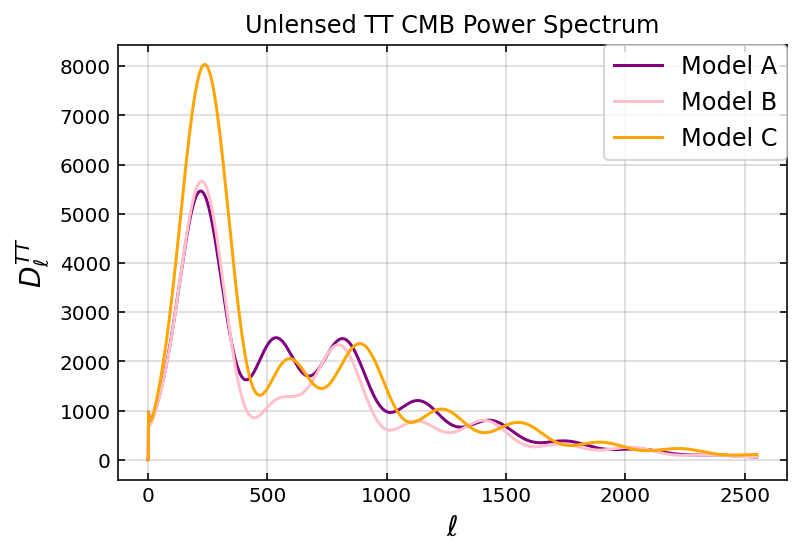

In [20]:
#Plotting Model A,B,C

ls = np.arange(totCL_A.shape[0])

plt.plot(ls,unlensedCL_A[:,0], color='purple', label = "Model A")
plt.plot(ls,unlensedCL_B[:,0], color='pink', label = "Model B")
plt.plot(ls,unlensedCL_C[:,0], color='orange', label = "Model C")
    
pretty_plot(
    xlabel='$\ell$',
    ylabel="$D_{\ell}^{TT}$",
    title="Unlensed TT CMB Power Spectrum",
)


#### Conclusion: 
Comparing the different models and their peaks we can make some conclusions about how this relates to the cosmology. Our odd peaks (first and third) reveal information about the compression, while our even peaks tell us about the expansion. The maximum compression achieved by the masses at the bottom of the potential well depends on the pressure and the mass, and is larger for larger mass because the masses have greater inertia. In contrast, the maximum rarefaction does not depend on the masses. For instance, the first peak is consistent in the location and just slightly shifted in the y direction. This is a result of the geometry of the universe which we have assumed to be flat for all models. Larger amounts of baryons like in Model C reduce the frequency of oscillations at all scales. The oscillations have higher frequencies at higher multipoles, hence the multipole of the first peak is higher for Model C because of the large increase in baryons. Indicating a difference outside of just the geometry of the universe for the first peak. Observing the second peak we can see that comparing models B and C to model A we get a decrease in the second peak from increasing the baryons which allows for an increase in inertia from having a larger mass in the universe. Seeing the shift in the second and third peak comparing model C and Model A would also be from the increase in baryons causing an increase in the frequency of oscillations. Lastly, the third peak comes from oscillations that have had time to reach maximum density, then minimum density, and then maximum density. The third peak is our indication of Dark Matter. Increasing baryons means increasing of dark matter which will enhance the height of the third peak of the power spectrum as compared to the second, which is indicated in models B and C, compared with A. 



### 2. CDM density fluctuation amplitude 

In [21]:
z = np.linspace(0, 1e7, 10000, endpoint=True)
ks = [0.01, 0.1, 1] # /Mpc

delta_cdm_A = camb.get_transfer_functions(parsA).get_redshift_evolution(ks, z, ['delta_cdm'])
delta_cdm_B = camb.get_transfer_functions(parsB).get_redshift_evolution(ks, z, ['delta_cdm'])
delta_cdm_C = camb.get_transfer_functions(parsC).get_redshift_evolution(ks, z, ['delta_cdm'])

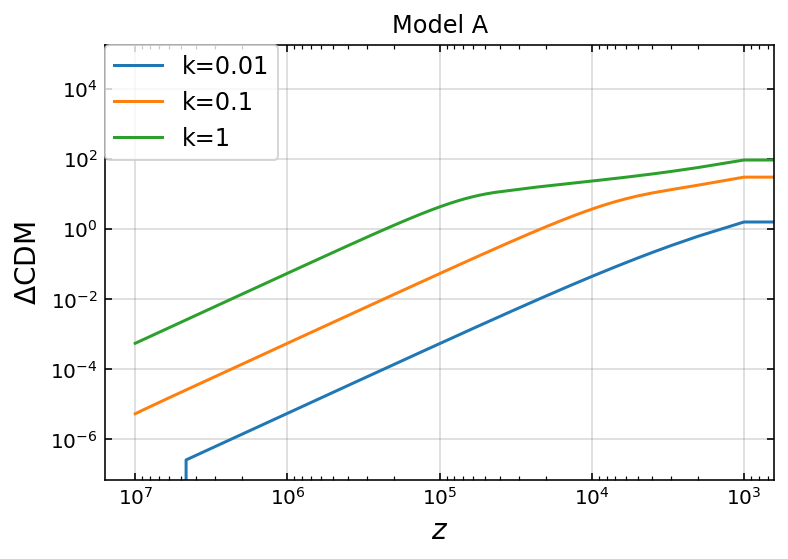

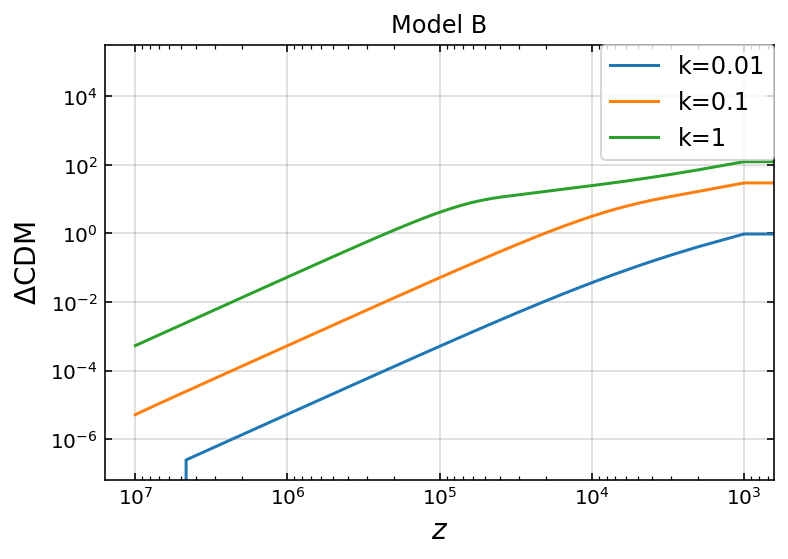

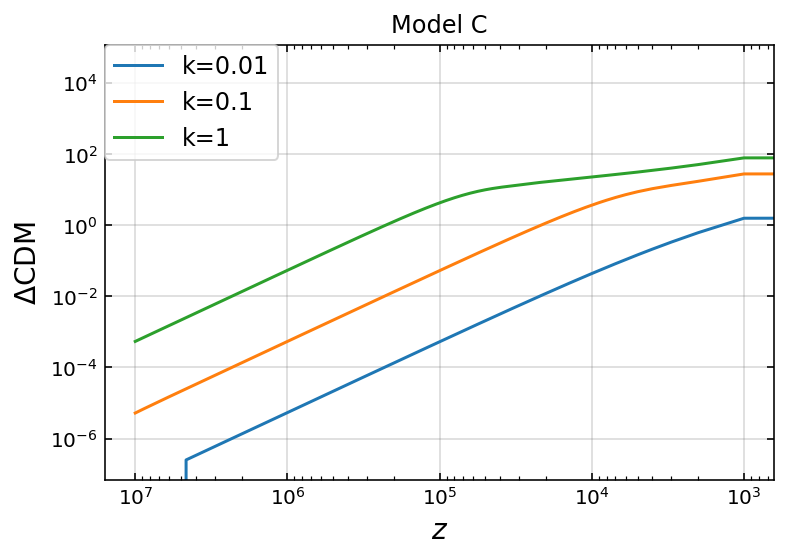

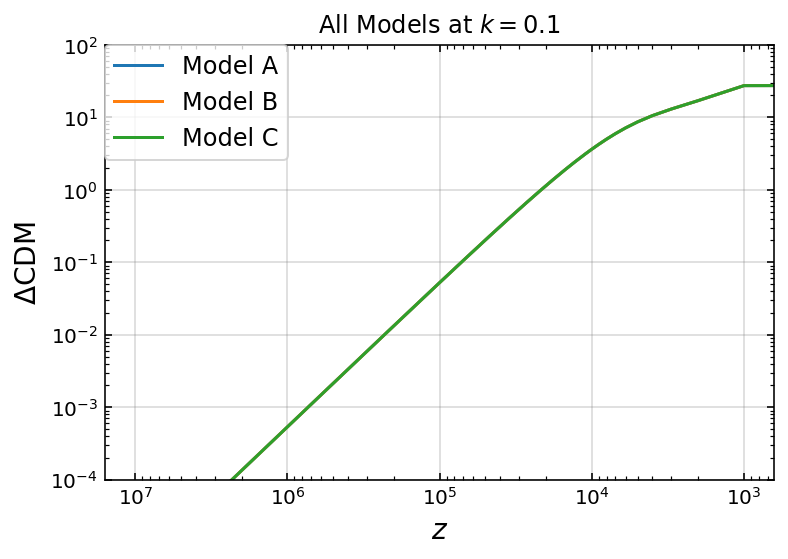

In [22]:
def part_2():

    def plot_delta_cdm_for_model(model, delta_cdm):
        for i, k in enumerate(ks):
            plt.loglog(z, delta_cdm[i,:,0], label=f"k={k}")
            plt.gca().invert_xaxis()

        pretty_plot(
            xlabel='$z$',
            ylabel="$\Delta$CDM",
            title=model
        )
        plt.show()

    models = [(delta_cdm_A,"A"), (delta_cdm_B,"B"), (delta_cdm_C,"C")]
    for delta_cdm, model in models:
        plot_delta_cdm_for_model(f"Model {model}", delta_cdm)


    for delta_cdm, model in models:
        plt.loglog(z, delta_cdm_C[1,:,0], label=f"Model {model}")
        plt.gca().invert_xaxis()
        plt.ylim(1e-4, 1e2)

    pretty_plot(
        xlabel='$z$',
        ylabel="$\Delta$CDM",
        title="All Models at $k=0.1$"
    )
    plt.show()

part_2()

#### Conclusion: 

Here we can see very obviously that as k increases, the CDM fluctuation amplitude increases overall. Considering the evolution over redshift we can see this shape is the same showing a consistent results within the evolution. While for each model at k = 0.1 we get and interesting result of all three models displaying the same CMD fluctutations. This is due to the changes in parameters do not related to our CDM fluctuation amplitude. 

### 3. Linear matter power spectrum

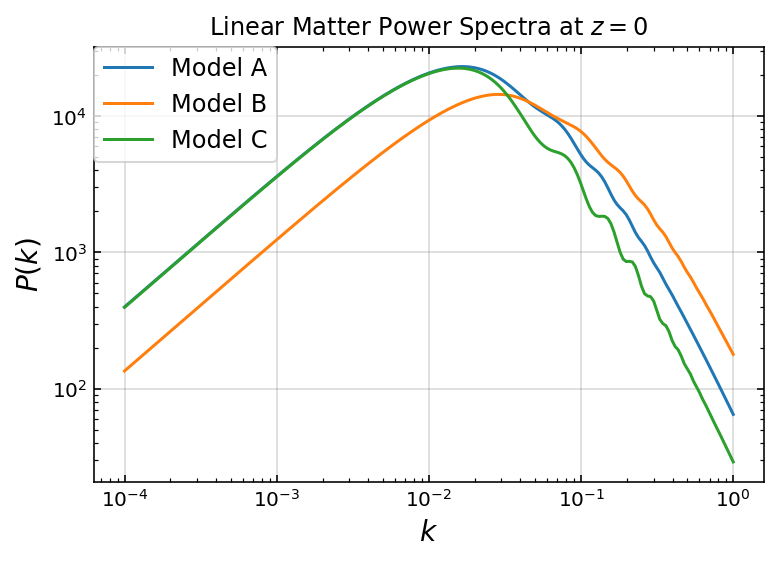

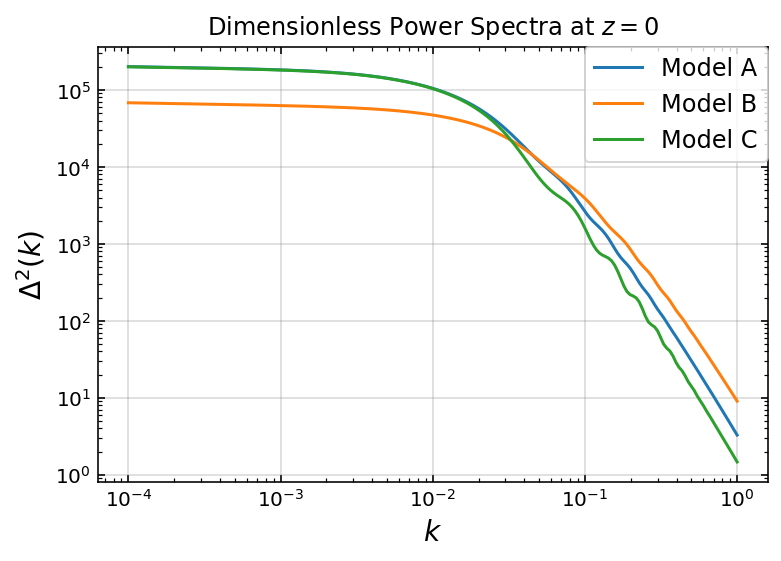

In [23]:
def part_3():
    def pk_for_model(pars):
        pars = pars.copy()
        pars.set_matter_power(redshifts=[0.], kmax=2.0)
        #Linear spectra
        pars.NonLinear = model.NonLinear_none
        results = camb.get_results(pars)
        kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
        s8 = np.array(results.get_sigma8())
        return kh, pk
    
    A = pk_for_model(parsA)
    B = pk_for_model(parsB)
    C = pk_for_model(parsC)
    
    for (kh, pk), model_name in [(A, "A"), (B, "B"), (C, "C")]:
        plt.loglog(kh, pk[0,:], label=f"Model {model_name}")
    
    pretty_plot(
        xlabel="$k$",
        ylabel="$P(k)$",
        title="Linear Matter Power Spectra at $z=0$"
    )
    
    plt.show()
    
    for (kh, pk), model_name in [(A, "A"), (B, "B"), (C, "C")]:
        plt.loglog(kh, pk[0,:]/(kh * 2 * np.pi**2), label=f"Model {model_name}")

    pretty_plot(
        xlabel="$k$",
        ylabel="$\Delta^2(k)$",
        title="Dimensionless Power Spectra at $z=0$"
    )

part_3()

#### Conclusion: 
It would not be completely straightforward to differentiate between these models on a basis of $P(k)$ While the models have characteristics of their own it would depend on the values of k considered. At k > 10^-2 it would be rather straight forward but otherwise would be difficult to discern model A from model C.  

### 4. RMS fluctuation amplitude

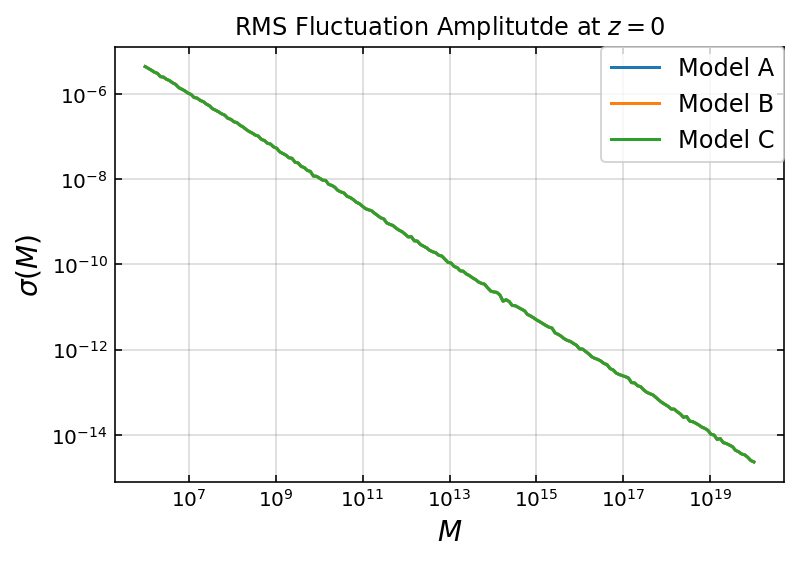

In [45]:
def part_4():
    M = np.logspace(6, 20, 200)
    
    def sigmaR_for_model(pars):
        pars = pars.copy()
        pars.set_matter_power(redshifts=[0], kmax=10)
        
        results = camb.get_results(pars)
        
        omtot = results.get_background_densities([1.0])["tot"]
        om0h2 = pars.ombh2 + pars.omch2
        
        rho_m = omtot * om0h2
        
        R = (3 * M / (4 * np.pi * rho_m)) ** (1/3)
        
        return results.get_sigmaR(R, z_indices=-1) # -1 gives redshift 0
    
    for pars, m in [(parsA, "A"), (parsB, "B"), (parsC, "C")]:
        plt.loglog(M, sigmaR_for_model(parsA), label=f"Model {m}")
    
    pretty_plot(
        xlabel="$M$",
        ylabel="$\sigma(M)$",
        title="RMS Fluctuation Amplitutde at $z = 0$"
    )
    

part_4()

### End Notebook